In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from  google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [9]:
 df = pd.read_csv('Titanic-Dataset.csv')
 df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
df.shape

(891, 12)

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**DATA PRE PROCESSING AND CLEANING**

In [15]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
df.duplicated().sum()

0

In [17]:
n = df.isna().sum().sort_values(ascending=False)       #checking null values
n = n[n>0]
n

Cabin       687
Age         177
Embarked      2
dtype: int64

In [18]:
df.isnull().sum().sort_values(ascending=False)*100/len(df)


Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [19]:
df.drop(columns = 'Cabin', axis = 1, inplace = True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
df['Age'].fillna(df['Age'].mean(),inplace=True)             #filling null values in age column with mean age
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [23]:
df.isna().sum()          #checking again for null values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
df[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']].nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             89
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [25]:
df['Sex'].unique()


array(['male', 'female'], dtype=object)

In [26]:
df['Survived'].unique()

array([0, 1])

In [27]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [28]:
df['Pclass'].unique()

array([3, 1, 2])

In [29]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [30]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
df.drop(columns=['PassengerId','Name','Ticket'],axis=1,inplace=True)   #Dropping Unwanted  Columns
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [33]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
df.describe(include='O')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


**DATA VISUALIZATION**

In [70]:
d1 = df['Sex'].value_counts()
d1

male      577
female    314
Name: Sex, dtype: int64

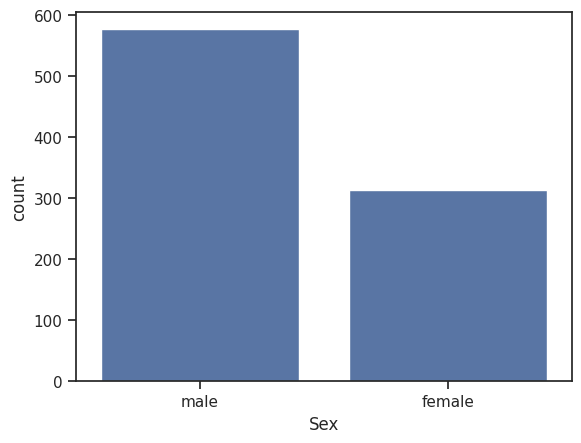

In [71]:
# Plotting Count plot for sex column
sns.countplot(x= df['Sex'] ,data = df)
plt.show()

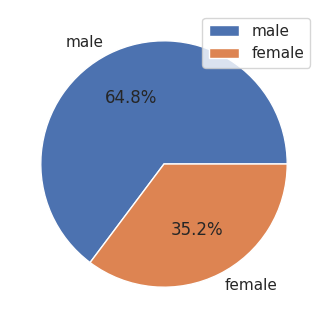

In [72]:
plt.figure(figsize=(4,4))
plt.pie(d1.values,labels=d1.index,autopct='%.1f%%')                #Plotting Percentage Distribution of sex Column
plt.legend()
plt.show()

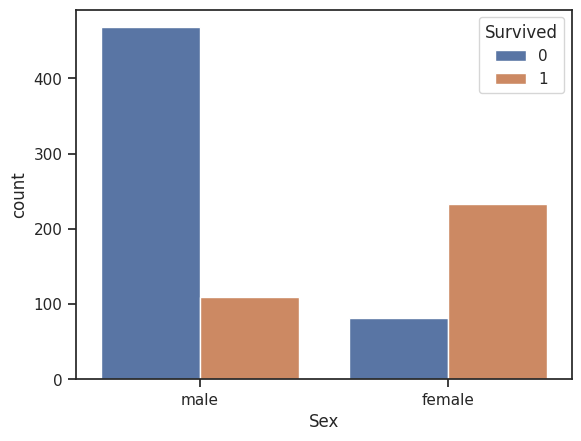

In [73]:
sns.countplot(x=df['Sex'],hue=df['Survived']) # In Sex (0 represents female and 1 represents male)
plt.show()

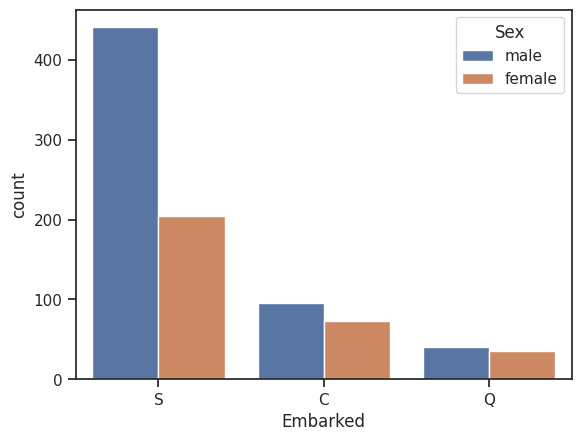

In [66]:
sns.countplot(x=df['Embarked'],hue=df['Sex'])
plt.show()

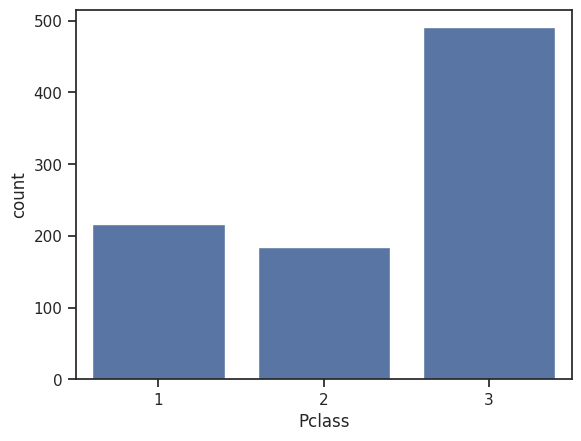

In [74]:
sns.countplot(x=df['Pclass'])
plt.show()

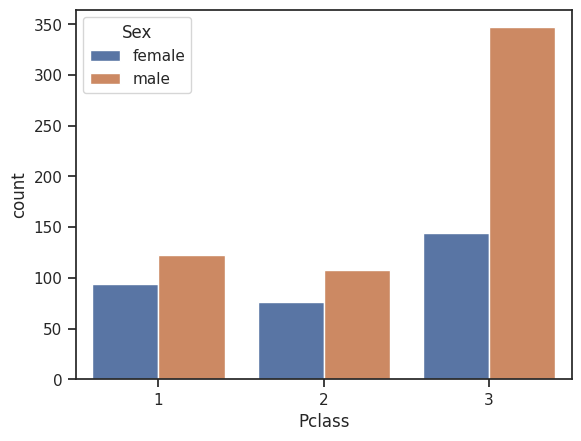

In [76]:
sns.countplot(x=df['Pclass'],hue=df['Sex'])
plt.show()

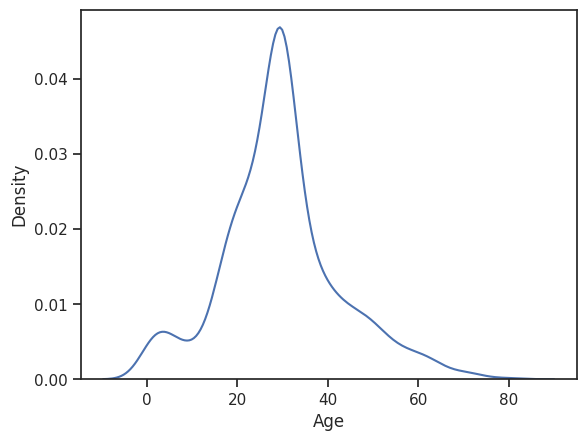

In [77]:
sns.kdeplot(x=df['Age'])
plt.show()

0    549
1    342
Name: Survived, dtype: int64


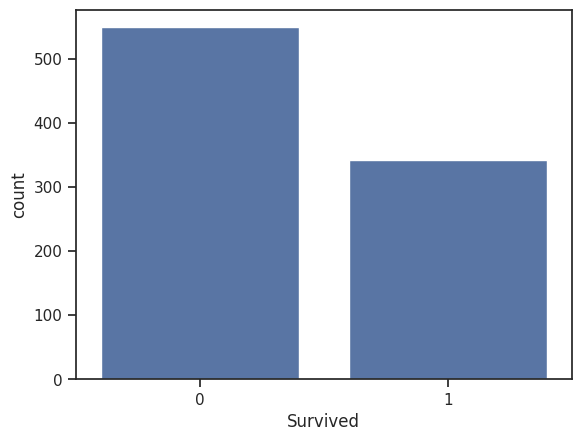

In [78]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'])
plt.show()

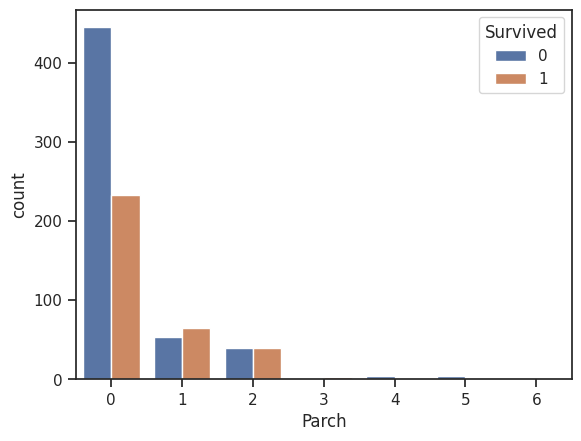

In [79]:
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.show()

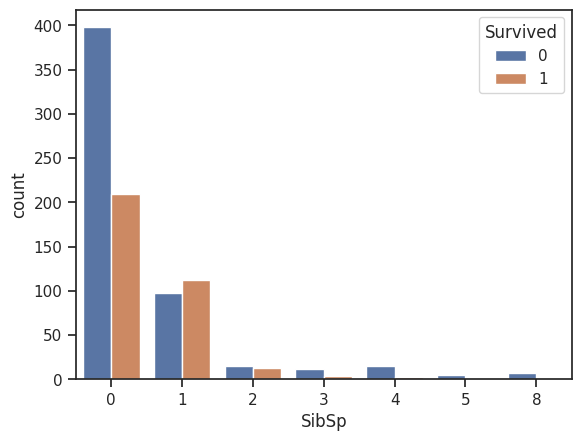

In [80]:
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.show()

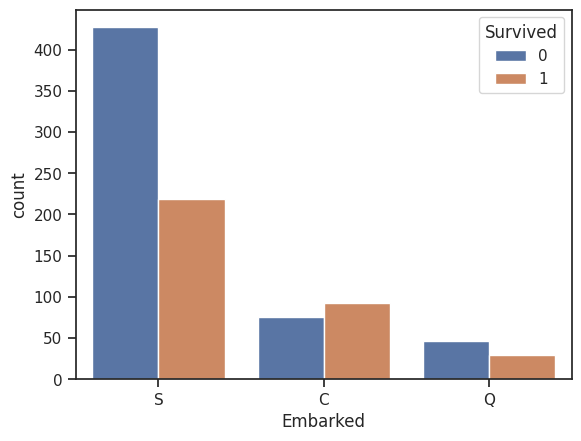

In [82]:
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.show()

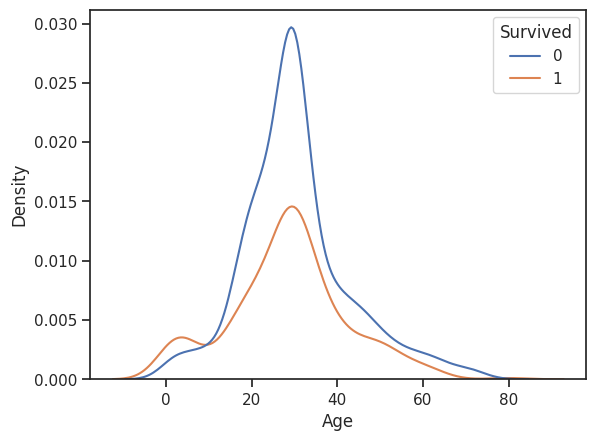

In [83]:
sns.kdeplot(x=df['Age'],hue=df['Survived'])
plt.show()

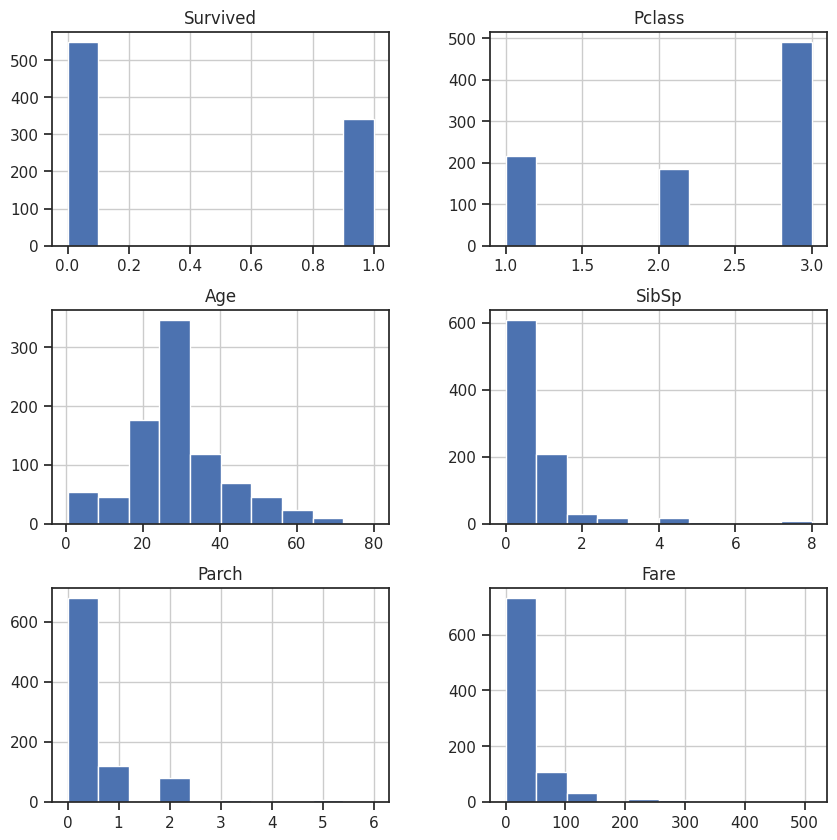

In [84]:
df.hist(figsize=(10,10))
plt.show()

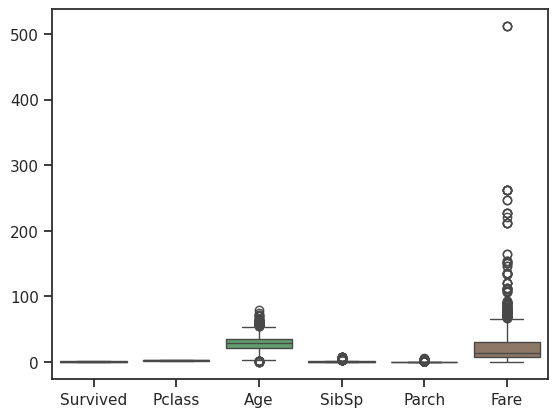

In [85]:
sns.boxplot(df)
plt.show()

In [86]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


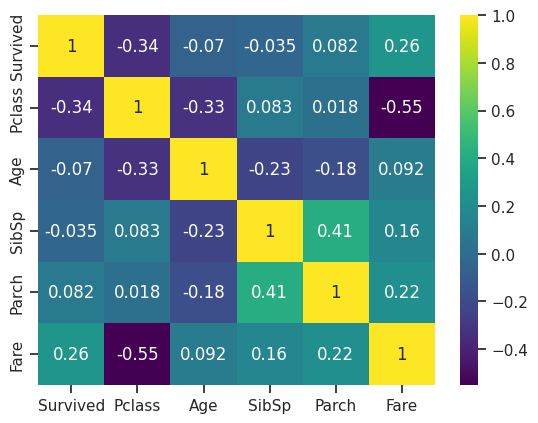

In [89]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

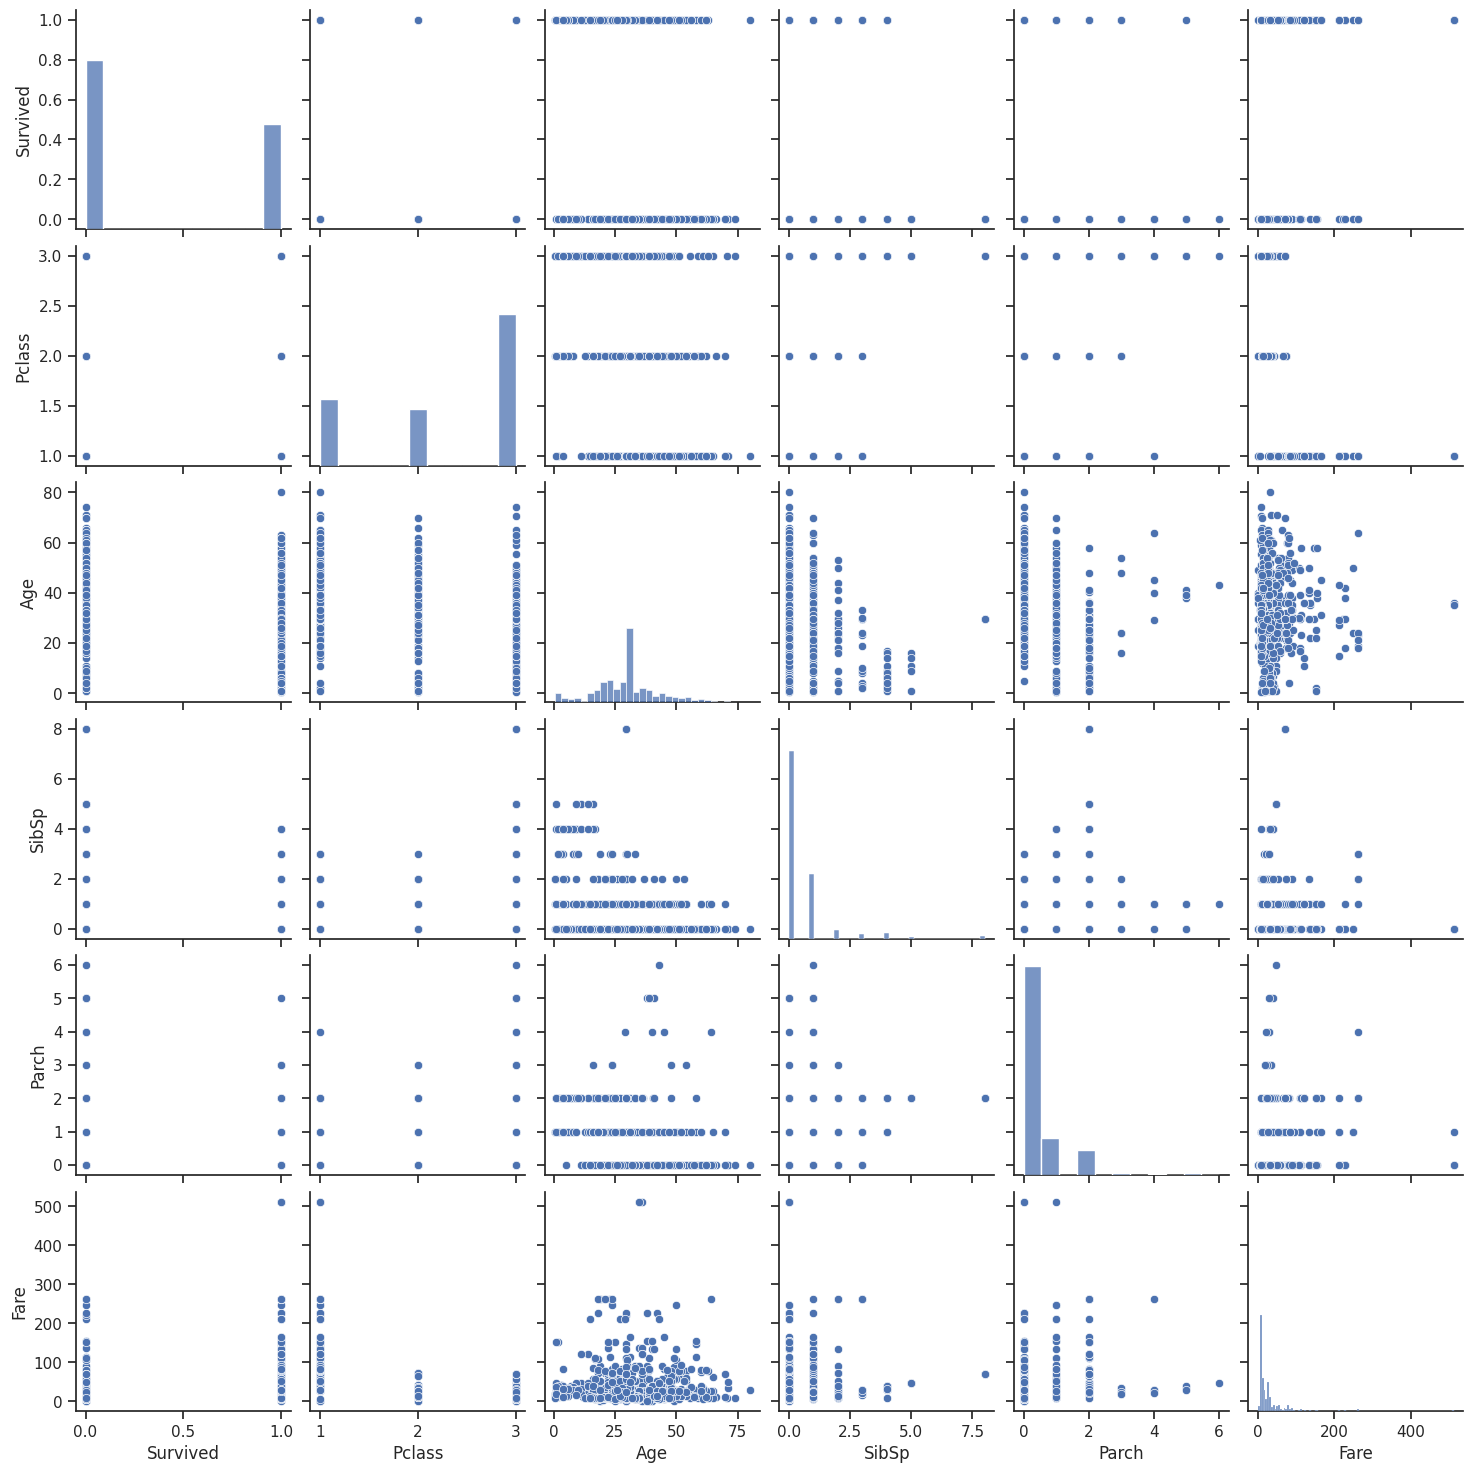

In [90]:
sns.pairplot(df)
plt.show()

In [91]:
df['Survived'].value_counts()          #Target Variables


0    549
1    342
Name: Survived, dtype: int64

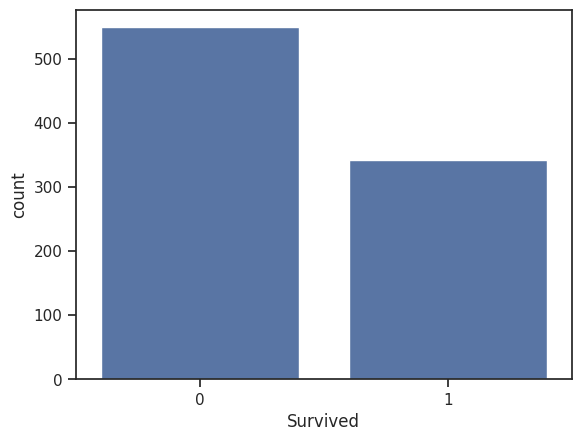

In [92]:
sns.countplot(x=df['Survived'])
plt.show()

**LABEL ENCODING**

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in ['Sex','Embarked']:
      df[column] = le.fit_transform(df[column])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


**DATA MODELLING**

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [99]:
cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
x = df[cols]
y = df['Survived']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(891, 7)
(891,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [100]:
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [101]:
y.head()


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**TRAIN_TEST_SPLIT**



In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 7)
(90, 7)
(801,)
(90,)


**LOGISTIC REGRESSION**

In [107]:
def cls_eval(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))

def mscore(model):
    print('Training Score',model.score(x_train,y_train))  # Training Accuracy
    print('Testing Score',model.score(x_test,y_test))

In [103]:
lr = LogisticRegression(max_iter=1000,solver='liblinear')
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [108]:
mscore(lr)


Training Score 0.8052434456928839
Testing Score 0.7666666666666667


In [110]:
ypred_lr = lr.predict(x_test)
print(ypred_lr)


[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [111]:
cls_eval(y_test,ypred_lr)
acc_lr = accuracy_score(y_test,ypred_lr)
print('Accuracy Score',acc_lr)


Confusion Matrix
 [[46  7]
 [14 23]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.87      0.81        53
           1       0.77      0.62      0.69        37

    accuracy                           0.77        90
   macro avg       0.77      0.74      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


**RANDOM FOREST**

In [113]:
rf=RandomForestClassifier(n_estimators=80,criterion='entropy',min_samples_split=5,max_depth=10)
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=80)

In [114]:
mscore(rf)

Training Score 0.916354556803995
Testing Score 0.7555555555555555


In [115]:
ypred_rf = rf.predict(x_test)
print(ypred_rf)

[1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [116]:
cls_eval(y_test,ypred_rf)
acc_rf = accuracy_score(y_test,ypred_rf)
print('Accuracy Score',acc_rf)

Confusion Matrix
 [[47  6]
 [16 21]]
Classification Report
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90

Accuracy Score 0.7555555555555555


**DECISIONTREE CLASSIFIER**

In [117]:
dt = DecisionTreeClassifier(max_depth=5,criterion='entropy',min_samples_split=10)
dt.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [118]:
mscore(dt)

Training Score 0.8526841448189763
Testing Score 0.7777777777777778


In [119]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]


In [120]:
cls_eval(y_test,ypred_dt)
acc_dt = accuracy_score(y_test,ypred_dt)
print('Accuracy Score',acc_dt)


Confusion Matrix
 [[46  7]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.87      0.82        53
           1       0.77      0.65      0.71        37

    accuracy                           0.78        90
   macro avg       0.78      0.76      0.76        90
weighted avg       0.78      0.78      0.77        90

Accuracy Score 0.7777777777777778


**ADA BOOST CLASSIFIER**

In [121]:
ada_boost  = AdaBoostClassifier(n_estimators=80)
ada_boost.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=80)

In [122]:
mscore(ada_boost)

Training Score 0.8564294631710362
Testing Score 0.7666666666666667


In [141]:
ypred_ada_boost = ada_boost.predict(x_test)

In [124]:
cls_eval(y_test,ypred_ada_boost)
acc_adab = accuracy_score(y_test,ypred_ada_boost)
print('Accuracy Score',acc_adab)

Confusion Matrix
 [[45  8]
 [13 24]]
Classification Report
               precision    recall  f1-score   support

           0       0.78      0.85      0.81        53
           1       0.75      0.65      0.70        37

    accuracy                           0.77        90
   macro avg       0.76      0.75      0.75        90
weighted avg       0.77      0.77      0.76        90

Accuracy Score 0.7666666666666667


In [133]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Random Forest Classifier','Decision Tree Classifier','Ada Boost Classifier'],
    'Score': [acc_lr,acc_rf,acc_dt,acc_adab]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree Classifier,0.777778
0,Logistic Regression,0.766667
3,Ada Boost Classifier,0.766667
1,Random Forest Classifier,0.755556


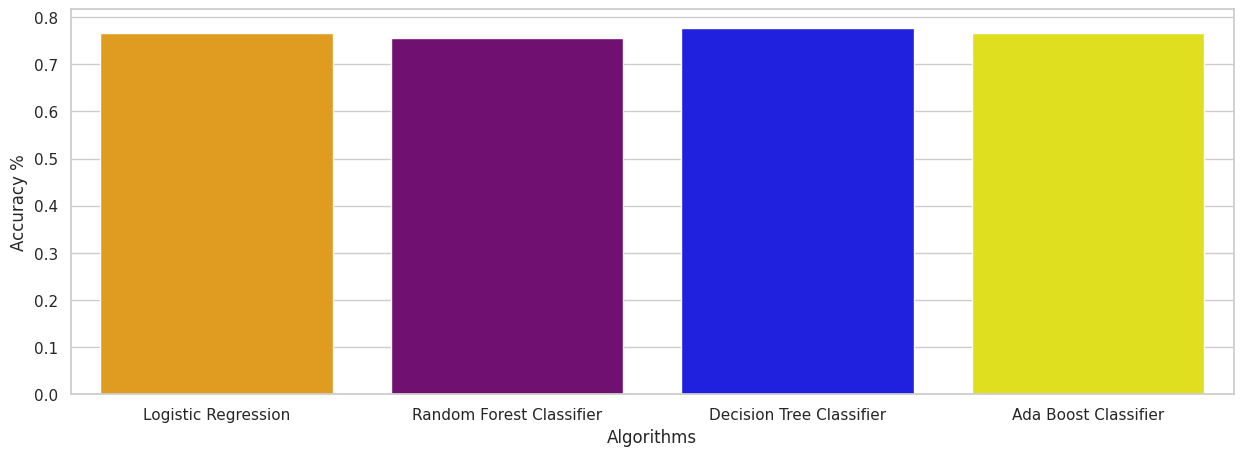

In [139]:
colors = ["orange", "purple", "blue", "yellow",]

sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

We can see that DecisionTree Classfier Got the Highest Accuracy - 0.77